In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# API 활용하여 데이터 수집하기

구글 지오코딩(Geocoding) API를 사용하여 데이터를 수집해볼 것이다. 이 API는 장소 이름 또는 주소를 입력하면 위도와 경도 좌표 정보를 변환해주는 서비스이다. 서비스를 이용하려면 사용자 인증 후에 API키를 발급받아야한다.

발급 순서

1. 구글 지도 서비스 접속
2. 새 프로젝트 만들기
3. API 설정
4. 사용자 인증
5. API 키 발급

파이썬 환경에서 구글 지오 코딩을 사용하기 위해 googlemaps 라이브러리를 설치한다.

In [ ]:
!pip install googlemaps

  Created wheel for googlemaps: filename=googlemaps-4.5.3-py3-none-any.whl size=38479 sha256=e2800f9992f5ba9ae0cc89433e5763df35951c7afe67b0162d63e3d16d373b3e
  Stored in directory: /root/.cache/pip/wheels/fa/1a/1c/cc0b8a1652a3f06aea586b0e4714a81bafed830513969baf92
Successfully built googlemaps


In [ ]:
import googlemaps
import pandas as pd

api_key = 'API KEY'

# 구글맵스 객체 생성
maps = googlemaps.Client(key=api_key)

lat = [] # 위도
lng = [] # 경도

# 장소 (또는 주소) 리스트
places = ["서울시청", "국립국악원", "해운대해수욕장"]

for i, place in enumerate(places):
    try:
        print(i+1, place)
        # 지오코딩 API 결과값 호출하여 geo_location 변수에 저장
        geo_location = maps.geocode(place)[0].get('geometry')
        lat.append(geo_location['location']['lat'])
        lng.append(geo_location['location']['lng'])
    except:
        lat.append('')
        lng.append('')
        print(i+1)

print(lat)
print(lng) 

1 서울시청
2 국립국악원
3 해운대해수욕장
[37.5662952, 37.4777592, 35.1586975]
[126.9779451, 127.0083043, 129.1603842]


In [ ]:
# 데이터프레임 변환
df = pd.DataFrame({'위도':lat, '경도':lng}, index=places)
df

,위도,경도
서울시청,37.566295,126.977945
국립국악원,37.477759,127.008304
해운대해수욕장,35.158698,129.160384


# 데이터 저장하기

* CSV 파일로 저장

        csv 파일로 저장 : DataFrame.to_csv("파일 이름(경로)")

In [ ]:
import pandas as pd

# 판다스 DataFrame() 함수로 데이터프레임 변환
data = {'name' : [ 'Jerry', 'Riah', 'Paul'],
        'algol' : [ "A", "A+", "B"],
        'basic' : [ "C", "B", "B+"],
        'c++' : [ "B+", "C", "C+"],
        }

df = pd.DataFrame(data)
df.set_index('name', inplace=True)
df

,algol,basic,c++
name,,,
Jerry,A,C,B+
Riah,A+,B,C
Paul,B,B+,C+


In [ ]:
# to_csv() 메소드를 사용하여 csv 파일로 내보내기.
df.to_csv("./df_sample.csv")

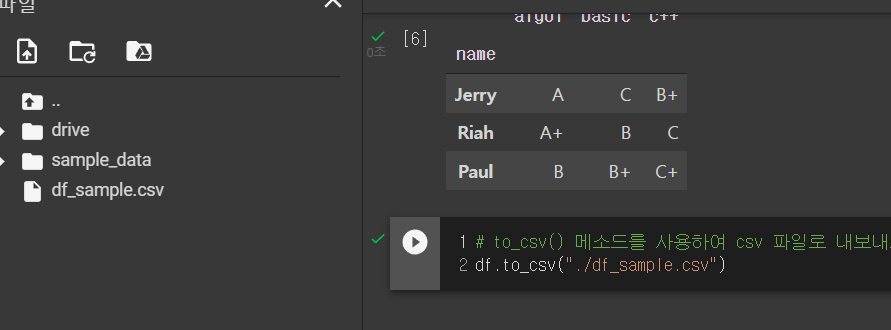

* JSON 파일로 저장

        json 파일로 저장 : DataFrame.to_json("파일 이름(경로)")

In [ ]:
import pandas as pd

# 판다스 DataFrame() 함수로 데이터프레임 변환. 변수 df에 저장 
data = {'name' : [ 'Jerry', 'Riah', 'Paul'],
        'algol' : [ "A", "A+", "B"],
        'basic' : [ "C", "B", "B+"],
        'c++' : [ "B+", "C", "C+"],
        }

df = pd.DataFrame(data)
df.set_index('name', inplace=True)
df

,algol,basic,c++
name,,,
Jerry,A,C,B+
Riah,A+,B,C
Paul,B,B+,C+


In [ ]:
# to_json() 메소드를 사용하여 JSON 파일로 내보내기
df.to_json("./df.sample.json")

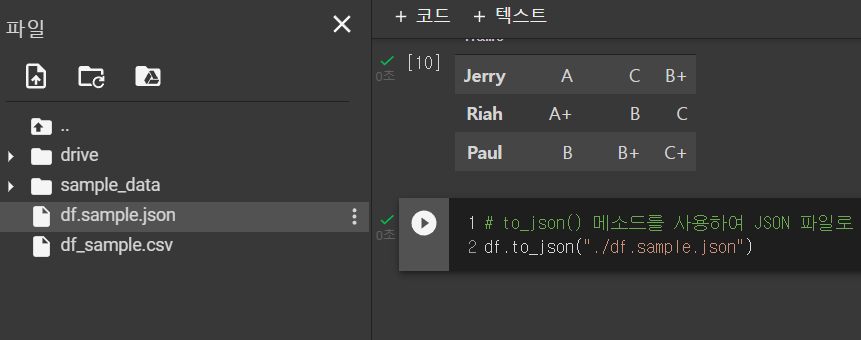

* Excel 파일로 저장

            Excel 파일로 저장 : DataFrame.to_excel("파일 이름(경로)")

In [ ]:
import pandas as pd

# 판다스 DataFrame() 함수로 데이터프레임 변환. 변수 df에 저장 
data = {'name' : [ 'Jerry', 'Riah', 'Paul'],
        'algol' : [ "A", "A+", "B"],
        'basic' : [ "C", "B", "B+"],
        'c++' : [ "B+", "C", "C+"],
        }

df = pd.DataFrame(data)
df.set_index('name', inplace=True)   #name 열을 인덱스로 지정
df

,algol,basic,c++
name,,,
Jerry,A,C,B+
Riah,A+,B,C
Paul,B,B+,C+


In [ ]:
# to_excel() 메소드를 사용하여 엑셀 파일로 내보내기
df.to_excel("./df_sample.xlsx")

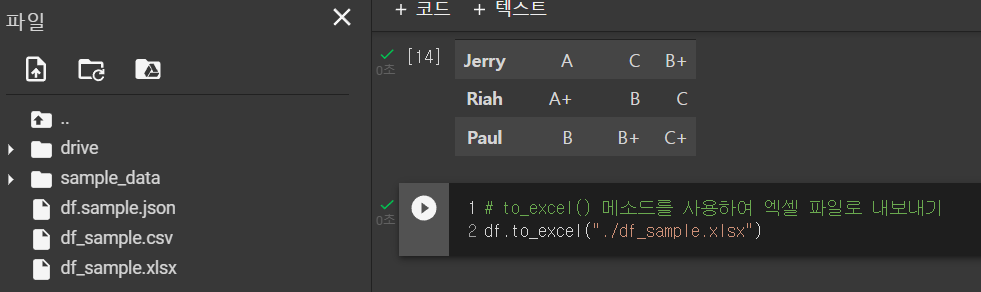

* 여러 개의 데이터프레임을 하나의 Excel 파일로 저징

판다스 ExcelWriter() 함수는 Excel 워크북 객체를 생성한다. 워크북 객체는 우리가 알고 있는 Excel 파일이라고 생각하면 된다. 데이터프레임에 to_excel() 메소드를 적용할 때 삽입하려는 워크북 객체(Excel 파일)를 인자로 전달한다. 또한 sheet_name 옵션에 Excel 파이르이 시트 이름을 입력하여 삽입되는 시트 위치를 지정할 수 있다. 한편 데이터프레임을 삽입하는 시트 이름을 다르게 설정하면, 같은 Excel 파일의 서로 다른 시트에 여러 데이터프레임을 구분하여 저장한다.

        pandas.ExcelWriter("파일 이름(경로)")

In [ ]:
import pandas as pd

# 판다스 DataFrame() 함수로 데이터프레임 변환. 변수 df1, df2에 저장 
data1 = {'name' : [ 'Jerry', 'Riah', 'Paul'],
         'algol' : [ "A", "A+", "B"],
         'basic' : [ "C", "B", "B+"],
          'c++' : [ "B+", "C", "C+"]}

data2 = {'c0':[1,2,3], 
         'c1':[4,5,6], 
         'c2':[7,8,9], 
         'c3':[10,11,12], 
         'c4':[13,14,15]}

In [ ]:
df1 = pd.DataFrame(data1)
df1.set_index('name', inplace=True)      #name 열을 인덱스로 지정
df1

,algol,basic,c++
name,,,
Jerry,A,C,B+
Riah,A+,B,C
Paul,B,B+,C+


In [ ]:
df2 = pd.DataFrame(data2)
df2.set_index('c0', inplace=True)        #c0 열을 인덱스로 지정
df2

,c1,c2,c3,c4
c0,,,,
1,4,7,10,13
2,5,8,11,14
3,6,9,12,15


In [ ]:
# df1을 'sheet1'으로, df2를 'sheet2'로 저장 (엑셀파일명은 "df_excelwriter.xlsx")
writer = pd.ExcelWriter("./df_excelwriter.xlsx")
df1.to_excel(writer, sheet_name="sheet1")
df2.to_excel(writer, sheet_name="sheet2")
writer.save()

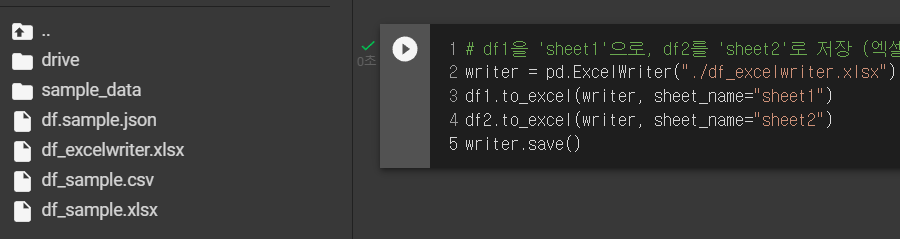

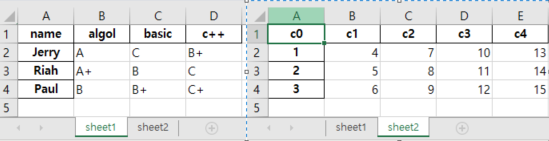